In [ ]:
## IMPLEMENTATION OF RANDOM FOREST REGRESSION FOR POSITION OF SALARIES ##

In [75]:
# Google Drive Connect
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


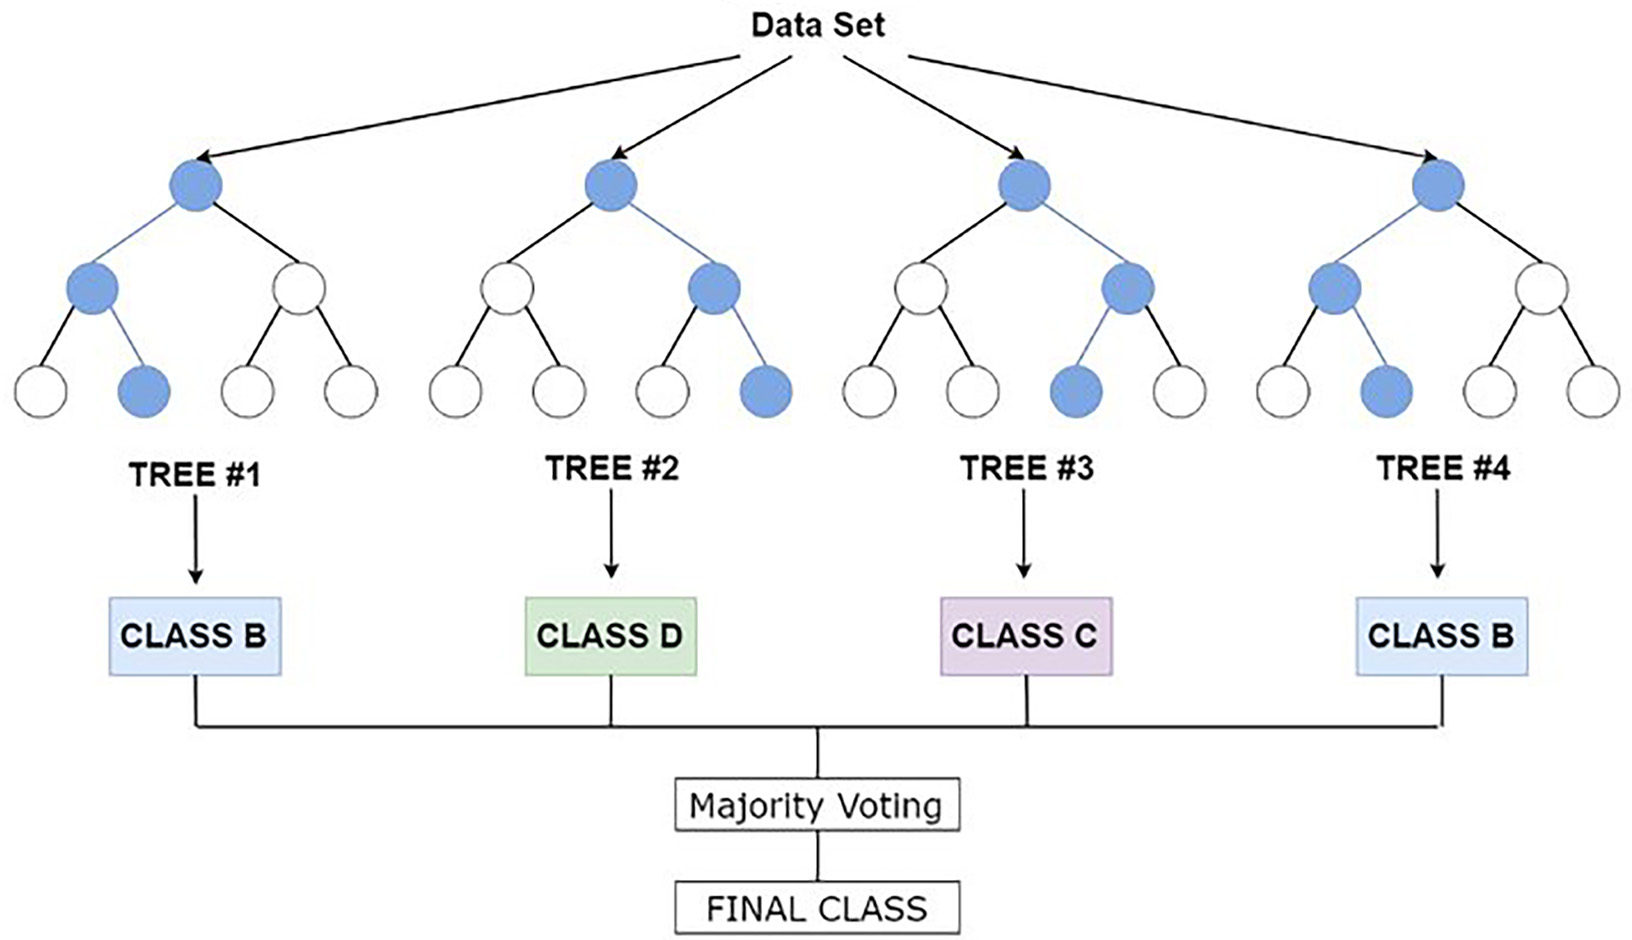

In [76]:
from IPython.display import display
from PIL import Image

path="/content/drive/MyDrive/Random forest regression for position of salaries/RF Algorithm.jpg"
display(Image.open(path))

In [77]:
from datetime import datetime

dt_string = datetime.now().strftime("Date: %d/%m/%Y and Time %H:%M:%S")
print(f"Updated Project: {dt_string}")

Updated Project: Date: 27/05/2022 and Time 08:12:38


In [78]:
## IMPORTING THE NECESSARY LIBRARIES ##

In [79]:
import pandas as pd # data processing, CSV file
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [80]:
## BASIC UNDERSTANDING OF THE DATA ##

In [82]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Random forest regression for position of salaries/Position_Salaries.csv')

In [ ]:
# Displaying the first 5 elements
df.head()  

,Position,Level,Salary
0,Senior Analyst,1,30000
1,Business Analyst,2,45000
2,Junior Consultant,3,50000
3,Senior Consultant,4,60000
4,First Manager,5,80000


In [83]:
df.shape

(17, 3)

In [84]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  17 non-null     object
 1   Level     17 non-null     int64 
 2   Salary    17 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 536.0+ bytes


In [85]:
# To get basic stats about our data like mean, median, count etc. 
# We use .describe() method as shown below:
df.describe()

,Level,Salary
count,17.000000,17.000000
mean,9.000000,206470.588235
std,5.049752,239457.490394
min,1.000000,30000.000000
25%,5.000000,60000.000000
50%,9.000000,150000.000000
75%,13.000000,200000.000000
max,17.000000,1000000.000000


In [86]:
# Checking Null value in training data
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [87]:
# Deleting null value value
df.dropna(inplace=True)

In [88]:
# Checking if there are any Duplicate values
print("# Duplicated values :",df.duplicated().sum())

# Duplicated values : 0


In [89]:
# Deleting Duplicate values
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [90]:
df.shape

(17, 3)

In [91]:
## SPLITTING DATA ##

In [92]:
# Splitting data into dependent (input) and independent (output) variables
X = df.iloc[:, 1].values
y = df.iloc[:, 2].values

In [93]:
# Splitting our data into Test set and Training set
# It’s just for illustration purpose, There is no need to split the dataset over here since we only have 10 values.
from sklearn.model_selection import train_test_split

# 70% for training, 30% for testing, test_size = 0.2 is 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
# For checking to ensure we have the the desired 70% train, 30% test split of the data

print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

76.47% in training set
23.53% in test set


In [95]:
X_train.shape

(13,)

In [96]:
X_test.shape

(4,)

In [97]:
## CREATING A RANDOM FOREST REGRESSION MODEL ##

In [98]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) # For this model I’ve chosen 10 trees (n_estimator=10)
regressor.fit(X.reshape(-1,1), y.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(n_estimators=10, random_state=0)

In [99]:
# Making predictions with our model
y_pred = regressor.predict([[6.5]])
y_pred

array([77500.])

In [100]:
## VISUALIZING THE RANDOM FOREST REGRESSION RESULTS ##

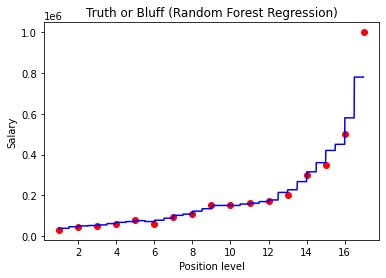

In [101]:
# Visualising the results

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
## SAVING THE MODEL ##

In [102]:
# Creating model using pickle
import pickle

with open('/content/drive/MyDrive/Random forest regression for position of salaries/Save files/random_forest_regression_model.pkl', 'wb') as file:
    # dump information to that file
    pickle.dump(regressor, file)

print("Saved model to disk")

Saved model to disk


In [ ]:
# Save as ipynb to html 
# !pip install nbconvert
!jupyter nbconvert --to html '/content/drive/MyDrive/Random forest regression for position of salaries/Random forest regression for position of salaries.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Random forest regression for position of salaries/Random forest regression for position of salaries.ipynb to html
